# PCA (MNIST)

El set de datos MNIST es un clasico set de datos de caracteres escritos a mano. 

Es un set de datos muy popular para introduccion a tecnicas de aprendizaje automatico o de metodos de reconocimiento, sin tener que hacer preprocesamiento complejo. 

Parametros | Numeros
--- | ---
Clases | 10
Samples por clase | ~7000 samples por clase
Samples totales | 70000
Dimensionalidad | 784
Features | valores enteros de 0 a 255

Puede obtenerse en el siguiente website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [12]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Objetivo

El principal objetivo de este ejemplo es mostrar una posible forma de agilizar algoritmo de aprendizaje automatico reduciendo el numero de componentes principales.

## Carga de Datos

In [13]:
# cargamos el mismo desde sklearn
mnist = fetch_mldata('MNIST original')

In [14]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [18]:
# estas son las imagenes
mnist.data.shape

(70000, 784)

In [19]:
# estos son los labels
mnist.target.shape

(70000,)

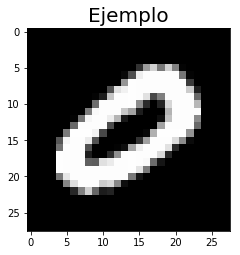

In [25]:
# visualizando una imagen "random" original del set de datos
from random import randint
# buscamos un valor random
i = randint(0, len(mnist.data))

# lo visualizamos
plt.figure(figsize=(8,4));
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[i].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Ejemplo', fontsize = 20);

# Aplicando PCA

In [32]:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
explained_variance = .95
pca = PCA(n_components=25)

In [33]:
# realizamos una reduccion de dimensiones
lower_dimensional_data = pca.fit_transform(mnist.data)

In [34]:
principal_components = pca.n_components_
principal_components

25

Uno de los objetivos que podriamos querer tener en este caso seria reducir la cantidad de dimensiones pasando de las 784 componentes a un valor menor para lograr un tiempo de ejecucion de un algoritmo de aprendizaje automatica mas rapido.

# Aproximando representacion con informacion reducida en dimensiones

Un aspecto interesante tambien es poder a partir de los datos reducidos en dimensiones aplicar la transformacion de forma inversa, para aproximar el set de datos original, en el siguiente ejemplo vamos a comparar los resultados que se pueden obtener comparando el set de datos real contra la reconstruccion del aproximado.

In [35]:
approximation = pca.inverse_transform(lower_dimensional_data)

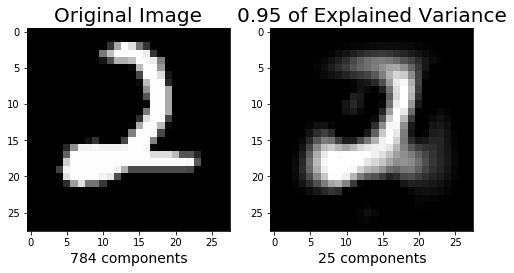

In [45]:
plt.figure(figsize=(8,4));

i = randint(0, len(mnist.data))

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[i].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[i].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(str(principal_components) + ' components', fontsize = 14)
plt.title(str(explained_variance) +' of Explained Variance', fontsize = 20);